In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score


import joblib 

In [200]:
df = pd.read_csv(r"C:\Users\USER\Desktop\DataGin_Python_Project\CSV_Files\diabetes_dataset.csv")
df.head(2)

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

In [202]:
df.describe()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50.12041,2.003670,118.911640,5.994787,6.997818,5.996468,0.219410,0.250800,0.079200,25.612653,...,185.978110,54.042790,103.000430,121.462650,111.11712,160.035050,9.061242,6.520776,30.222362,0.599980
std,15.60460,1.417779,84.409662,1.780954,1.094622,2.468406,0.413849,0.433476,0.270052,3.586705,...,32.013005,10.267374,33.390256,43.372619,13.59561,30.935472,4.954060,0.813921,9.061505,0.489904
min,18.00000,0.000000,0.000000,0.000000,3.000000,0.500000,0.000000,0.000000,0.000000,15.000000,...,100.000000,20.000000,50.000000,30.000000,60.00000,70.000000,2.000000,4.000000,2.700000,0.000000
25%,39.00000,1.000000,57.000000,4.800000,6.300000,4.300000,0.000000,0.000000,0.000000,23.200000,...,164.000000,47.000000,78.000000,91.000000,102.00000,139.000000,5.090000,5.970000,23.800000,0.000000
50%,50.00000,2.000000,100.000000,6.000000,7.000000,6.000000,0.000000,0.000000,0.000000,25.600000,...,186.000000,54.000000,102.000000,121.000000,111.00000,160.000000,8.790000,6.520000,29.000000,1.000000
75%,61.00000,3.000000,160.000000,7.200000,7.700000,7.700000,0.000000,1.000000,0.000000,28.000000,...,208.000000,61.000000,126.000000,151.000000,120.00000,181.000000,12.450000,7.070000,35.600000,1.000000
max,90.00000,10.000000,833.000000,10.000000,10.000000,16.800000,1.000000,1.000000,1.000000,39.200000,...,318.000000,98.000000,263.000000,344.000000,172.00000,287.000000,32.220000,9.800000,67.200000,1.000000


In [203]:
df.head(2)

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0


In [204]:
# features to use for the model training

age = df['age']
smoking_status = df['smoking_status']
alcohol_consumption = df['alcohol_consumption_per_week']
physical_activity = df['physical_activity_minutes_per_week']
sleep_hours = df['sleep_hours_per_day']
screen_time = df['screen_time_hours_per_day']
family_history = df['family_history_diabetes']
cardiovascular_history = df['cardiovascular_history']
bmi = df['bmi']
systolic_bp = df['systolic_bp']
diastolic_bp = df['diastolic_bp']
total_cholesterol = df['cholesterol_total']
glucose_fasting = df['glucose_fasting']
glucose_postprandial = df['glucose_postprandial']
insulin_level = df['insulin_level']

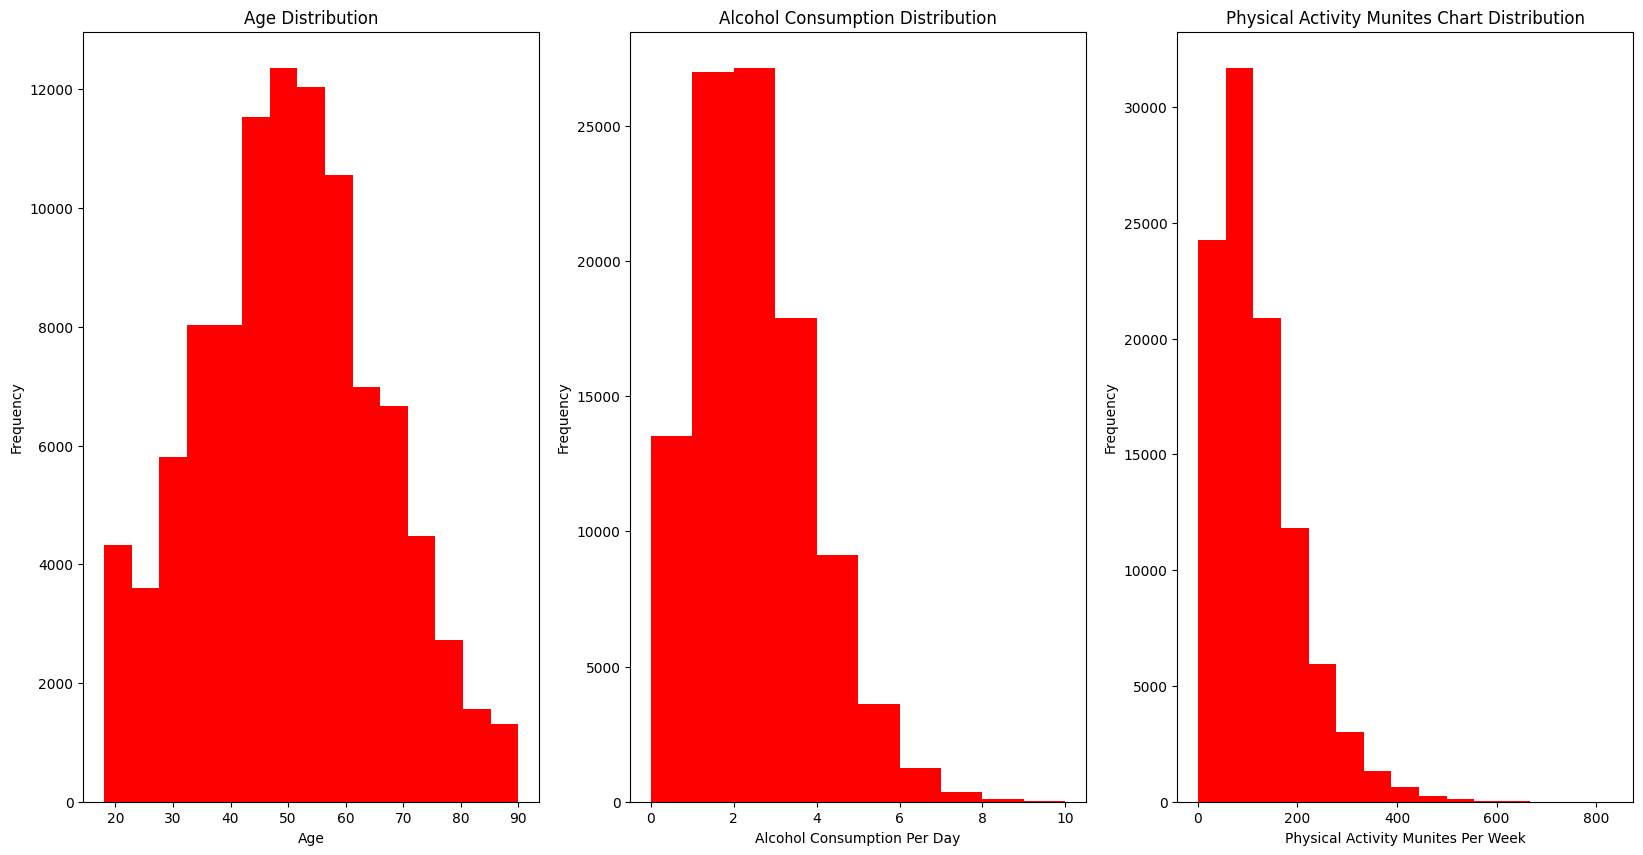

In [205]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.hist(age, bins = 15, color ='red')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.subplot(1,3,2)
plt.hist(alcohol_consumption, bins=10,color ='red')
plt.xlabel('Alcohol Consumption Per Day')
plt.ylabel('Frequency')
plt.title('Alcohol Consumption Distribution')
plt.subplot(1,3,3)
plt.hist(physical_activity, bins =15,color ='red')
plt.xlabel('Physical Activity Munites Per Week')
plt.ylabel('Frequency')
plt.title('Physical Activity Munites Chart Distribution')
plt.show()

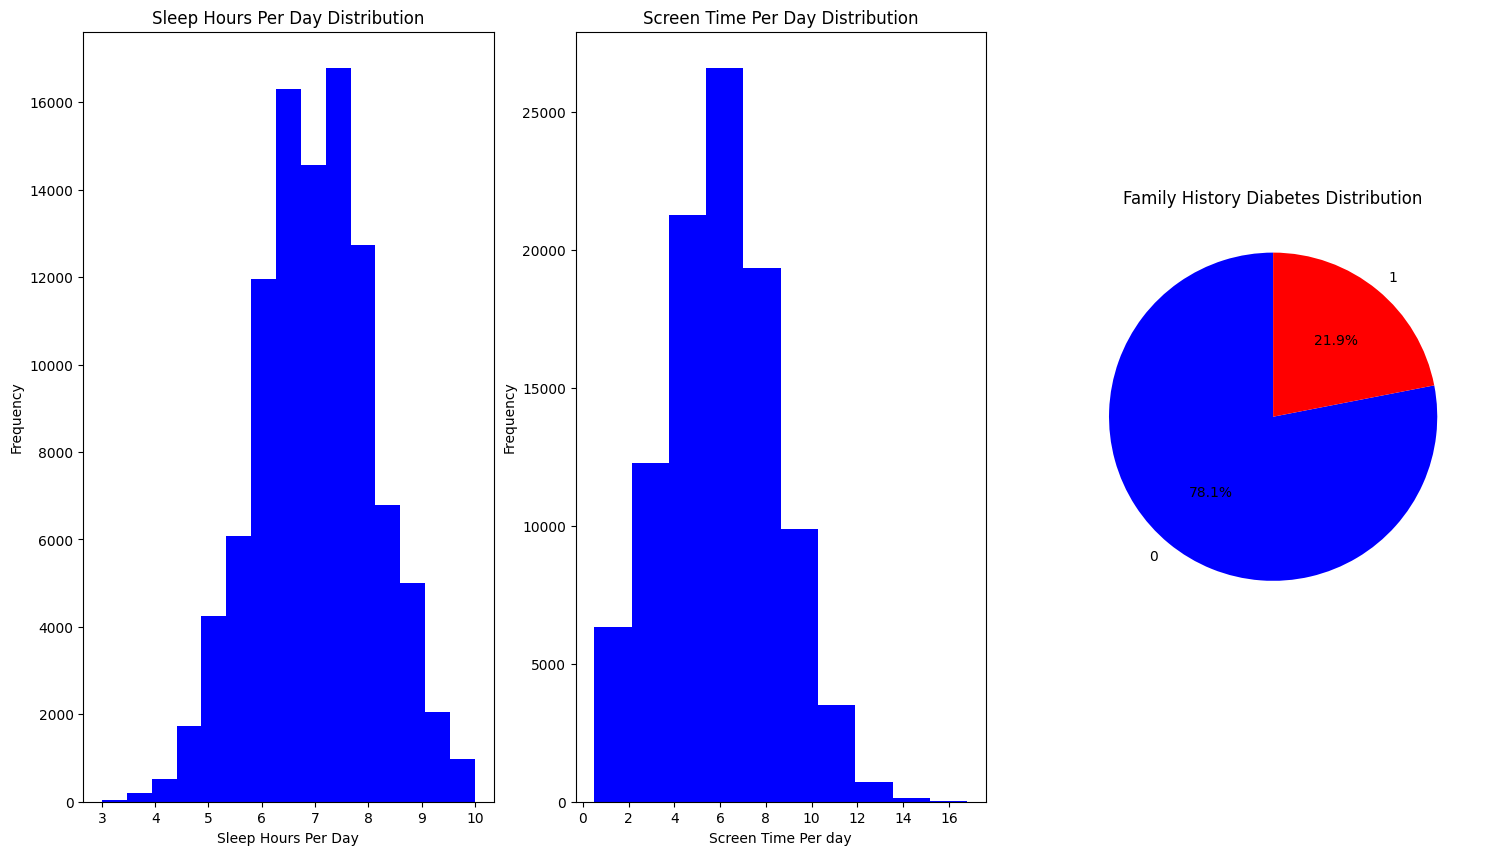

In [224]:
plt.figure(figsize=(18,10))
plt.subplot(1,3,1)
plt.hist(sleep_hours, bins = 15, color ='blue')
plt.title('Sleep Hours Per Day Distribution')
plt.xlabel('Sleep Hours Per Day')
plt.ylabel('Frequency')
plt.subplot(1,3,2)
plt.hist(screen_time, bins=10,color ='blue')
plt.xlabel('Screen Time Per day')
plt.ylabel('Frequency')
plt.title('Screen Time Per Day Distribution')
plt.subplot(1,3,3)
counts = df['family_history_diabetes'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors = ['blue','red'])
plt.title('Family History Diabetes Distribution')
plt.show()


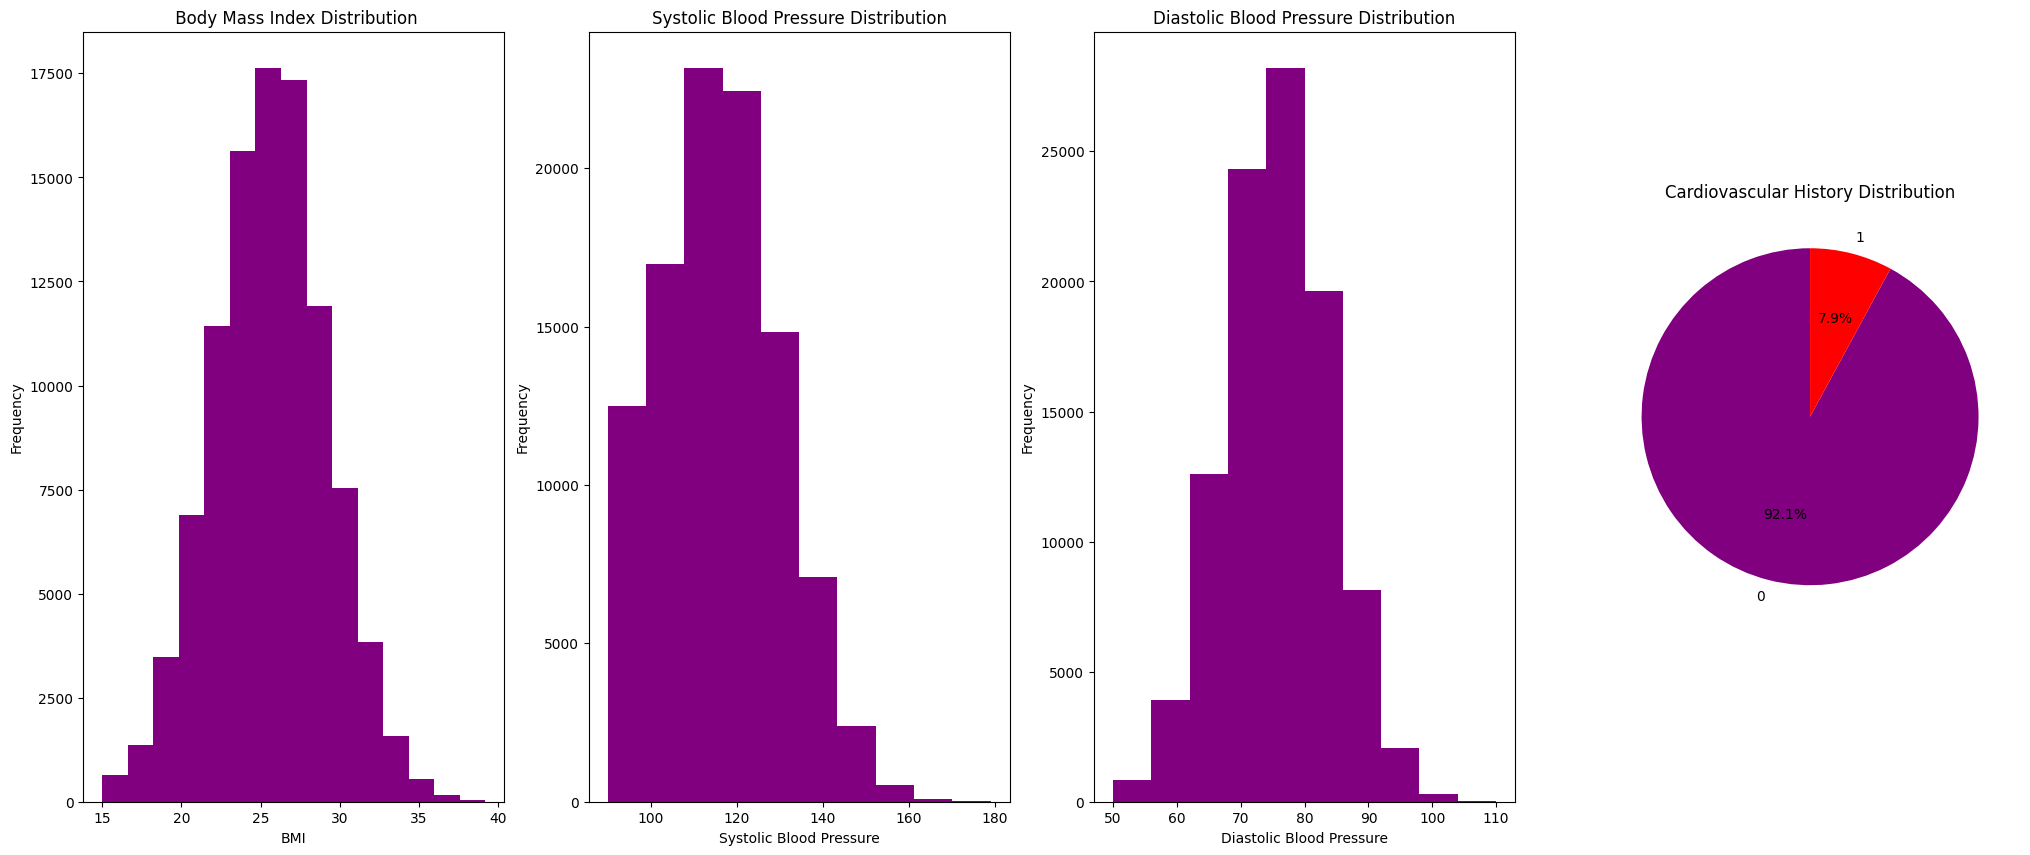

In [207]:

plt.figure(figsize=(25,10))
plt.subplot(1,4,1)
plt.hist(bmi, bins = 15, color ='purple')
plt.title(' Body Mass Index Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.subplot(1,4,2)
plt.hist(systolic_bp, bins=10,color ='purple')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Frequency')
plt.title('Systolic Blood Pressure Distribution')
plt.subplot(1,4,3)
plt.hist(diastolic_bp, bins=10,color ='purple')
plt.xlabel('Diastolic Blood Pressure')
plt.ylabel('Frequency')
plt.title('Diastolic Blood Pressure Distribution')
plt.subplot(1,4,4)
counts = df['cardiovascular_history'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors = ['purple','red'])
plt.title('Cardiovascular History Distribution')
plt.show()


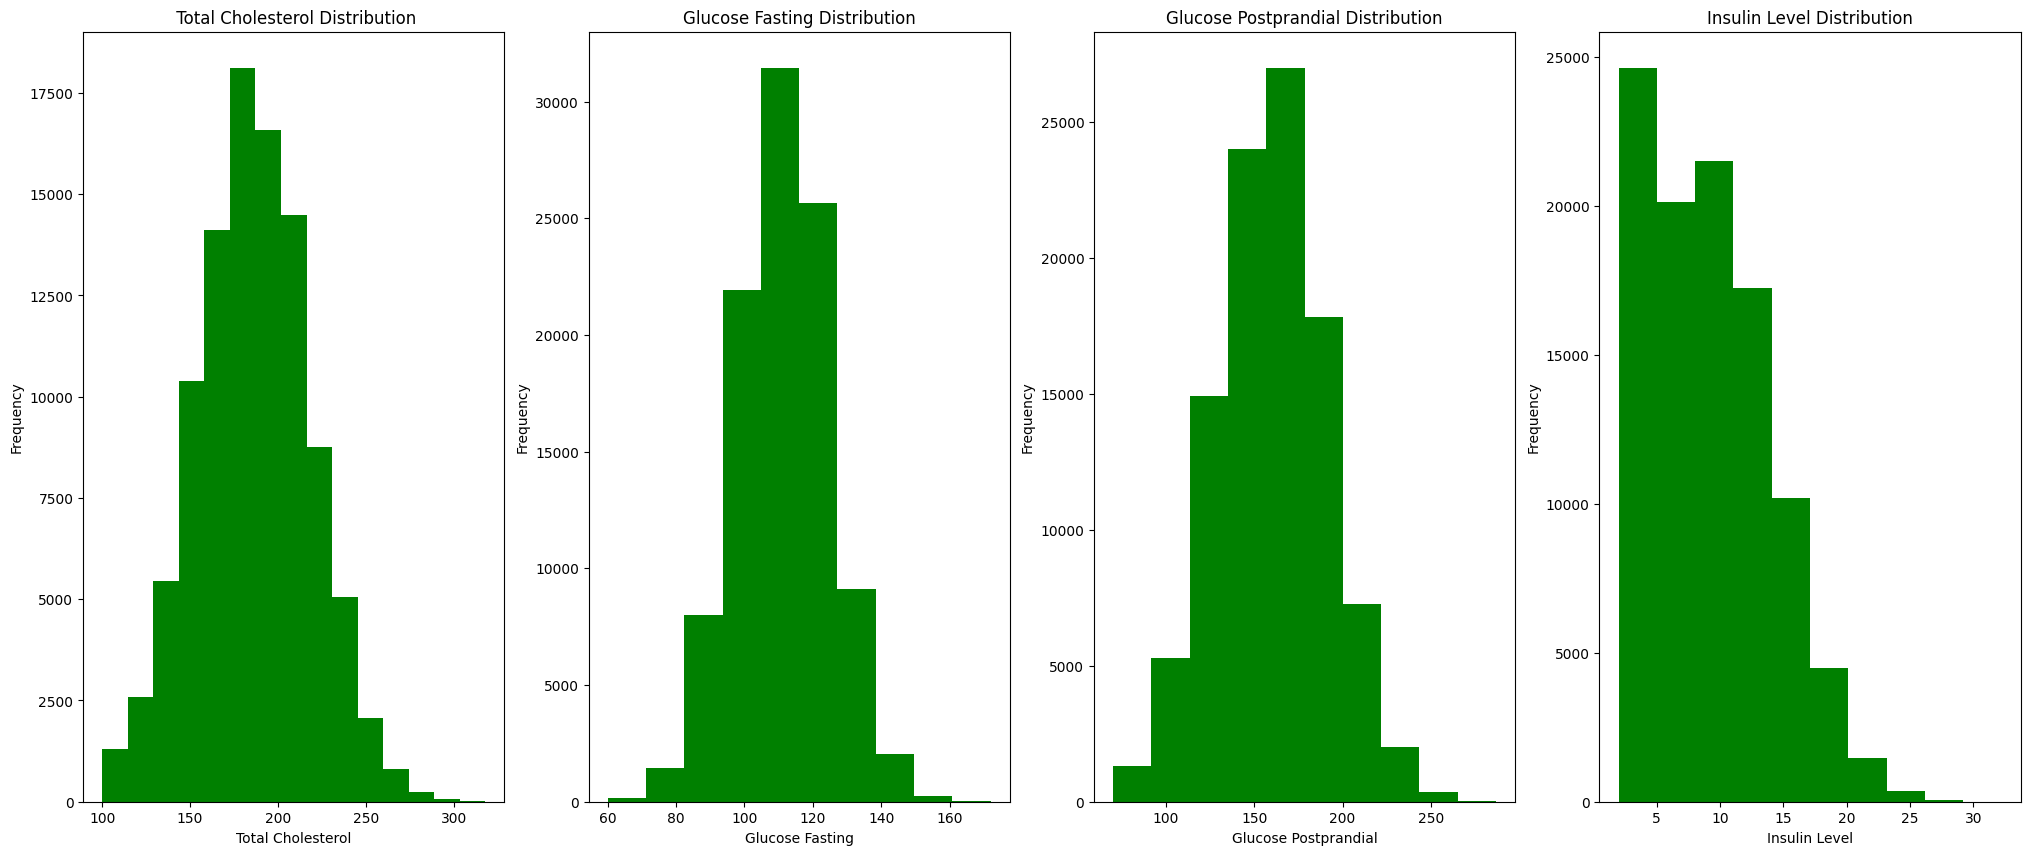

In [208]:
total_cholesterol = df['cholesterol_total']
glucose_fasting = df['glucose_fasting']
glucose_postprandial = df['glucose_postprandial']
insulin_level = df['insulin_level']


plt.figure(figsize=(25,10))
plt.subplot(1,4,1)
plt.hist(total_cholesterol, bins = 15, color ='green')
plt.title(' Total Cholesterol Distribution')
plt.xlabel('Total Cholesterol')
plt.ylabel('Frequency')
plt.subplot(1,4,2)
plt.hist(glucose_fasting, bins=10,color ='green')
plt.xlabel('Glucose Fasting')
plt.ylabel('Frequency')
plt.title('Glucose Fasting Distribution')
plt.subplot(1,4,3)
plt.hist(glucose_postprandial, bins=10,color ='green')
plt.xlabel('Glucose Postprandial')
plt.ylabel('Frequency')
plt.title('Glucose Postprandial Distribution')
plt.subplot(1,4,4)
plt.hist(insulin_level, bins=10,color ='green')
plt.xlabel('Insulin Level')
plt.ylabel('Frequency')
plt.title('Insulin Level Distribution')
plt.show()



In [209]:
# label encoding(Former, Never, Current
smoking_status = df['smoking_status'].value_counts()
smoking_status

smoking_status
Never      59813
Current    20176
Former     20011
Name: count, dtype: int64

In [210]:
encoder = LabelEncoder()
encoder.fit(new_df['smoking_status'])
smoking_encoded = encoder.transform(new_df['smoking_status'])
smoking_encoded = pd.DataFrame(smoking_encoded, columns=['Smoking_Status_Encoded'])

In [211]:
smoking_encoded.value_counts()

Smoking_Status_Encoded
2                         59813
0                         20176
1                         20011
Name: count, dtype: int64

In [212]:
new_df = df.drop(columns = ['gender','ethnicity','education_level','income_level','employment_status','diet_score','waist_to_hip_ratio','diagnosed_diabetes','heart_rate','hba1c','diabetes_risk_score','diabetes_stage','hdl_cholesterol','ldl_cholesterol','triglycerides'])



In [213]:
final_df = pd.concat([new_df.drop(columns =['smoking_status']),smoking_encoded], axis = 1)
final_df

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,systolic_bp,diastolic_bp,cholesterol_total,glucose_fasting,glucose_postprandial,insulin_level,Smoking_Status_Encoded
0,58,0,215,7.9,7.9,0,0,0,30.5,134,78,239,136,236,6.36,2
1,48,1,143,6.5,8.7,0,0,0,23.1,129,76,116,93,150,2.00,1
2,60,1,57,10.0,8.1,1,0,0,22.2,115,73,213,118,195,5.07,2
3,74,0,49,6.6,5.2,0,0,0,26.8,120,93,171,139,253,5.28,2
4,46,1,109,7.4,5.0,0,0,0,21.2,92,67,210,137,184,12.74,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,46,1,136,6.4,4.5,0,0,0,29.8,126,74,227,113,109,14.58,1
99996,41,3,76,6.8,4.8,0,0,0,26.5,130,76,207,96,146,9.02,2
99997,57,4,121,5.0,6.1,0,0,1,25.6,107,87,189,93,132,2.57,1
99998,47,3,52,6.7,0.5,0,1,0,26.8,115,77,173,106,117,9.81,2


In [214]:
x = final_df
y = df['diagnosed_diabetes'] 

In [215]:
y

0        1
1        0
2        1
3        1
4        1
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diagnosed_diabetes, Length: 100000, dtype: int64

In [216]:
#split the data into train and test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =42)

In [217]:
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [218]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 0, ..., 1, 0, 0], shape=(20000,))

In [219]:
#evaluate model
acc_score = accuracy_score(y_pred,y_test)
roc_score = roc_auc_score(y_pred, y_test)
conf_score = confusion_matrix(y_pred, y_test)

print(f'\nAccuracy Score: {acc_score}')
print('-'*20)
print(f'\nROC AUC Score: {roc_score}')
print('-'*20)
print(f'\nConfusion Matrix: ')
print(conf_score)



Accuracy Score: 0.79025
--------------------

ROC AUC Score: 0.7848632231056382
--------------------

Confusion Matrix: 
[[ 5608  1726]
 [ 2469 10197]]


In [220]:
new_data = pd.DataFrame({'age':[48],
            'alcohol_consumption_per_week': [0],
            'physical_activity_minutes_per_week': [143],
            'sleep_hours_per_day': [6.5],
            'screen_time_hours_per_day': [8.7],
            'family_history_diabetes':[0],
            'hypertension_history':[0],
            'cardiovascular_history':[0],
            'bmi': [23.1],
            'systolic_bp':[129],
            'diastolic_bp': [76],
            'cholesterol_total': [116],
            'glucose_fasting': [93],
            'glucose_postprandial':[150],
            'insulin_level':[2.00],
            'Smoking_Status_Encoded':[1]})
        

In [221]:
model.predict(new_data)

array([0])

In [223]:
joblib.dump(model, "diabetes_prediction_model.joblib")

['diabetes_prediction_model.joblib']